
Шаг времени 1:
Компания 1: Цена = 86, Рыночная доля = 0.27, Прибыль = 0.00
Компания 2: Цена = 57, Рыночная доля = 0.41, Прибыль = 0.00
Компания 3: Цена = 73, Рыночная доля = 0.32, Прибыль = 0.00

Шаг времени 2:
Компания 1: Цена = 89, Рыночная доля = 0.27, Прибыль = 0.00
Компания 2: Цена = 58, Рыночная доля = 0.41, Прибыль = 0.00
Компания 3: Цена = 74, Рыночная доля = 0.32, Прибыль = 0.00

Шаг времени 3:
Компания 1: Цена = 92, Рыночная доля = 0.27, Прибыль = 0.00
Компания 2: Цена = 62, Рыночная доля = 0.40, Прибыль = 0.00
Компания 3: Цена = 76, Рыночная доля = 0.33, Прибыль = 0.00

Шаг времени 4:
Компания 1: Цена = 96, Рыночная доля = 0.27, Прибыль = 0.00
Компания 2: Цена = 64, Рыночная доля = 0.40, Прибыль = 0.00
Компания 3: Цена = 79, Рыночная доля = 0.33, Прибыль = 0.00

Шаг времени 5:
Компания 1: Цена = 99, Рыночная доля = 0.27, Прибыль = 0.00
Компания 2: Цена = 67, Рыночная доля = 0.40, Прибыль = 0.00
Компания 3: Цена = 80, Рыночная доля = 0.33, Прибыль = 0.00

Шаг времени 6:
Комп

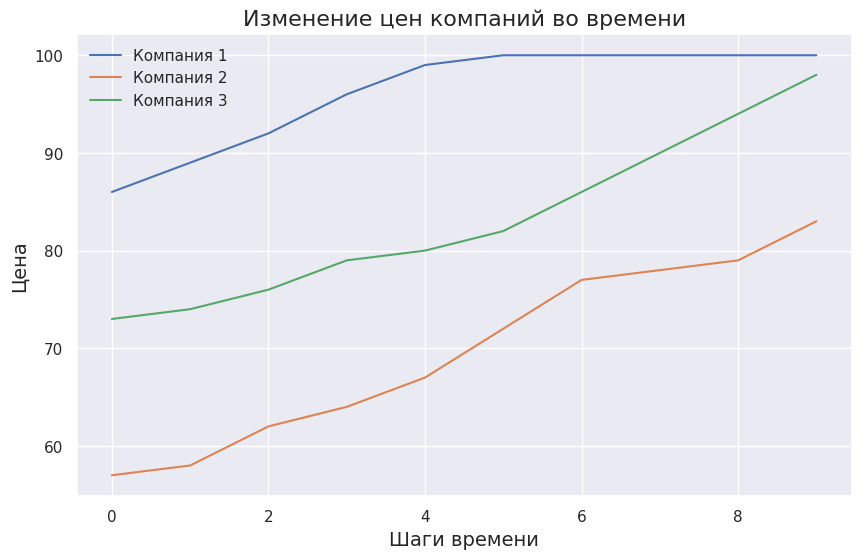

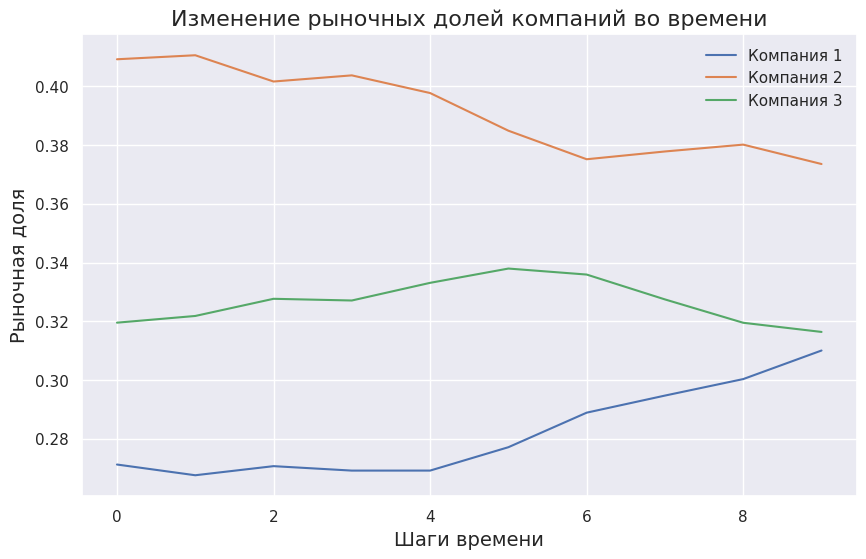

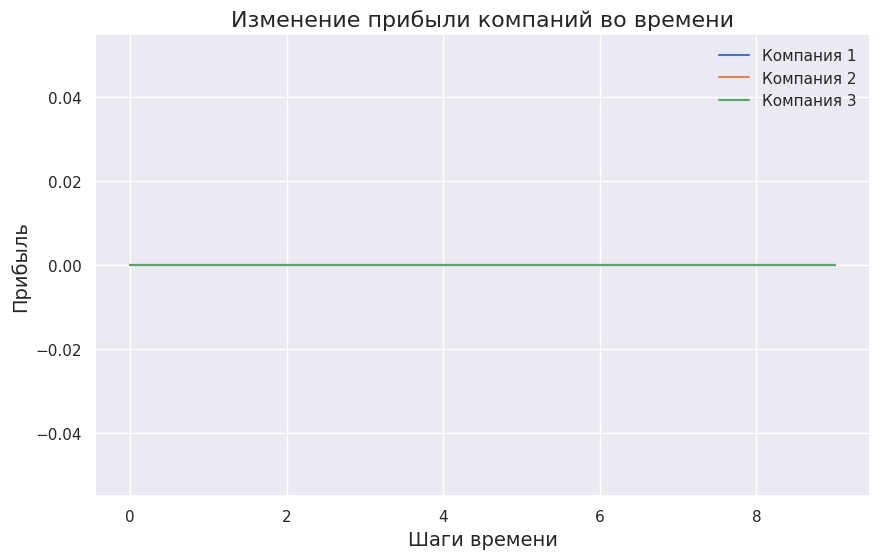

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Параметры игры
num_companies = 3           # Количество компаний
num_strategies = 100         # Диапазон возможных цен (от 1 до 100)
time_steps = 10              # Количество шагов во времени
demand_sensitivity = 1.5     # Коэффициент чувствительности спроса к цене

# Функция спроса, зависит от средней цены на рынке
def demand_function(prices):
    average_price = np.mean(prices)
    demand = max(0, 100 - demand_sensitivity * average_price)  # Общее количество спроса на рынке
    return demand

# Функция прибыли, учитывающая цену, переменные затраты и спрос
def profit_function(price, cost, market_share, total_demand):
    return market_share * total_demand * (price - cost)

# Начальные параметры компаний (например, разные переменные затраты)
costs = [random.uniform(10, 30) for _ in range(num_companies)]
prices = [random.randint(50, 100) for _ in range(num_companies)]  # Изначальные цены компаний

# История данных для визуализации
price_history = []
market_share_history = []
profit_history = []

# Игра во времени
for t in range(time_steps):
    print(f"\nШаг времени {t + 1}:")
    total_demand = demand_function(prices)  # Рассчитываем общий спрос на рынке

    # Рассчитываем рыночную долю для каждой компании (доля обратно пропорциональна цене)
    inverse_prices = np.array([1 / p for p in prices])
    market_shares = inverse_prices / np.sum(inverse_prices)  # Рыночная доля

    # Рассчитываем прибыль каждой компании
    profits = []
    for i in range(num_companies):
        profit = profit_function(prices[i], costs[i], market_shares[i], total_demand)
        profits.append(profit)
        print(f"Компания {i + 1}: Цена = {prices[i]}, Рыночная доля = {market_shares[i]:.2f}, Прибыль = {profit:.2f}")

    # Сохраняем данные для визуализации
    price_history.append(prices[:])
    market_share_history.append(market_shares[:])
    profit_history.append(profits[:])

    # Компании адаптируют свои цены на следующем шаге на основе прошлой прибыли
    # Если прибыль высока, цена увеличивается, если низка, цена уменьшается
    for i in range(num_companies):
        if profits[i] < np.mean(profits):  # Если прибыль ниже средней, снижаем цену
            prices[i] = max(1, prices[i] - random.randint(1, 5))
        else:  # Иначе увеличиваем
            prices[i] = min(100, prices[i] + random.randint(1, 5))

print("\nИгра завершена.")

# Преобразуем данные для визуализации
price_history = np.array(price_history)
market_share_history = np.array(market_share_history)
profit_history = np.array(profit_history)

# Настройки стиля Seaborn
sns.set(style="darkgrid")

# Визуализация изменения цен компаний
plt.figure(figsize=(10, 6))
for i in range(num_companies):
    sns.lineplot(x=np.arange(time_steps), y=price_history[:, i], label=f'Компания {i + 1}')
plt.title('Изменение цен компаний во времени', fontsize=16)
plt.xlabel('Шаги времени', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.legend()
plt.show()

# Визуализация изменения рыночных долей компаний
plt.figure(figsize=(10, 6))
for i in range(num_companies):
    sns.lineplot(x=np.arange(time_steps), y=market_share_history[:, i], label=f'Компания {i + 1}')
plt.title('Изменение рыночных долей компаний во времени', fontsize=16)
plt.xlabel('Шаги времени', fontsize=14)
plt.ylabel('Рыночная доля', fontsize=14)
plt.legend()
plt.show()

# Визуализация изменения прибыли компаний
plt.figure(figsize=(10, 6))
for i in range(num_companies):
    sns.lineplot(x=np.arange(time_steps), y=profit_history[:, i], label=f'Компания {i + 1}')
plt.title('Изменение прибыли компаний во времени', fontsize=16)
plt.xlabel('Шаги времени', fontsize=14)
plt.ylabel('Прибыль', fontsize=14)
plt.legend()
plt.show()
